In [2]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor,
    PassiveAggressiveRegressor, TheilSenRegressor, BayesianRidge, Lars, LassoLars
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Adım 1: Veri Yükleme ve Ön İşleme
# Veri setini yükle
df = pd.read_csv('data (2).csv')

# Eksik değerleri medyan ile doldurma
df['RM'] = df['RM'].fillna(df['RM'].median())

# Bağımsız değişkenleri (X) ve hedef değişkeni (y) ayırma
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Adım 2: Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adım 3: Özellikleri Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adım 4: Toplam 15 Modeli Tanımlama, Eğitme ve Değerlendirme
models = {
    'Doğrusal Regresyon': LinearRegression(),
    'Lasso Regresyonu': Lasso(random_state=42),
    'Ridge Regresyonu': Ridge(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Karar Ağacı': DecisionTreeRegressor(random_state=42),
    'Rastgele Orman': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN Regresyonu': KNeighborsRegressor(),
    'Huber Regresyonu': HuberRegressor(),
    'Passive Aggressive Regresyonu': PassiveAggressiveRegressor(random_state=42, max_iter=1000, tol=1e-3),
    'TheilSen Regresyonu': TheilSenRegressor(random_state=42),
    'Bayesian Ridge Regresyonu': BayesianRidge(),
    'Lars': Lars(),
    'Lasso Lars': LassoLars()
}

results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2'])

for name, model in models.items():
    try:
        # Modeli eğitme
        model.fit(X_train_scaled, y_train)

        # Tahmin yapma
        y_pred = model.predict(X_test_scaled)

        # Performans metriklerini hesaplama
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Sonuçları DataFrame'e ekleme
        results = pd.concat([results, pd.DataFrame([{'Model': name, 'MSE': mse, 'RMSE': rmse, 'R2': r2}])], ignore_index=True)
    except Exception as e:
        print(f"Model {name} eğitilirken bir hata oluştu: {e}")

# Adım 5: Sonuçları Sıralama ve Yazdırma
results_sorted = results.sort_values(by='R2', ascending=False).reset_index(drop=True)
print("\n15 Modelin Performans Karşılaştırması:")
print(results_sorted)

C:\Users\Mutlu\AppData\Local\Temp\ipykernel_14016\2426220858.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Model': name, 'MSE': mse, 'RMSE': rmse, 'R2': r2}])], ignore_index=True)



15 Modelin Performans Karşılaştırması:
                            Model         MSE       RMSE        R2
0               Gradient Boosting   23.521213   4.849867  0.725550
1                  Rastgele Orman   28.536270   5.341935  0.667034
2                     Karar Ağacı   36.071845   6.005984  0.579108
3                  KNN Regresyonu   37.412493   6.116575  0.563465
4                             SVR   44.311569   6.656694  0.482965
5                Huber Regresyonu   60.664930   7.788769  0.292151
6                     Elastic Net   66.546964   8.157632  0.223519
7             TheilSen Regresyonu   67.207275   8.198004  0.215814
8       Bayesian Ridge Regresyonu   70.641290   8.404837  0.175745
9                Ridge Regresyonu   71.113040   8.432855  0.170241
10             Doğrusal Regresyon   71.187798   8.437286  0.169369
11                           Lars   71.187798   8.437286  0.169369
12               Lasso Regresyonu   74.418969   8.626643  0.131667
13                    

##  hiperparametre ayarlama işlemi

In [3]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Adım 1: Veri Yükleme ve Ön İşleme
# Veri setini yükle
df = pd.read_csv('data (2).csv')

# Eksik değerleri medyan ile doldurma
df['RM'] = df['RM'].fillna(df['RM'].median())

# Bağımsız değişkenleri (X) ve hedef değişkeni (y) ayırma
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adım 2: Gradient Boosting Regresyonu için Hiperparametre Ayarlama
print("Gradient Boosting Regresyonu için hiperparametre ayarlama başlıyor...")

# Ayarlanacak hiperparametreler
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV nesnesini oluşturma
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Arama işlemini başlatma
grid_search_gb.fit(X_train_scaled, y_train)

# En iyi parametreleri ve skoru yazdırma
print("\nGradient Boosting En İyi Parametreler:", grid_search_gb.best_params_)
print("Gradient Boosting En İyi R2 Skoru (Eğitim):", grid_search_gb.best_score_)

# En iyi model ile test seti üzerinde tahmin yapma
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test_scaled)

# Test seti üzerinde nihai R2 skoru ve RMSE hesaplama
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"\nGradient Boosting Ayarlanmış Modelin Test R2 Skoru: {r2_gb:.4f}")
print(f"Gradient Boosting Ayarlanmış Modelin Test RMSE'si: {rmse_gb:.4f}")

print("\n" + "-"*50 + "\n")

# Adım 3: Random Forest Regresyonu için Hiperparametre Ayarlama
print("Random Forest Regresyonu için hiperparametre ayarlama başlıyor...")

# Ayarlanacak hiperparametreler
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV nesnesini oluşturma
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Arama işlemini başlatma
grid_search_rf.fit(X_train_scaled, y_train)

# En iyi parametreleri ve skoru yazdırma
print("\nRandom Forest En İyi Parametreler:", grid_search_rf.best_params_)
print("Random Forest En İyi R2 Skoru (Eğitim):", grid_search_rf.best_score_)

# En iyi model ile test seti üzerinde tahmin yapma
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test_scaled)

# Test seti üzerinde nihai R2 skoru ve RMSE hesaplama
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"\nRandom Forest Ayarlanmış Modelin Test R2 Skoru: {r2_rf:.4f}")
print(f"Random Forest Ayarlanmış Modelin Test RMSE'si: {rmse_rf:.4f}")

Gradient Boosting Regresyonu için hiperparametre ayarlama başlıyor...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Gradient Boosting En İyi Parametreler: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}
Gradient Boosting En İyi R2 Skoru (Eğitim): 0.8438484347622139

Gradient Boosting Ayarlanmış Modelin Test R2 Skoru: 0.6035
Gradient Boosting Ayarlanmış Modelin Test RMSE'si: 5.8297

--------------------------------------------------

Random Forest Regresyonu için hiperparametre ayarlama başlıyor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Random Forest En İyi Parametreler: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest En İyi R2 Skoru (Eğitim): 0.8397831411052732

Random Forest Ayarlanmış Modelin Test R2 Skoru: 0.6826
Random Forest Ayarlanmış Modelin Test RMSE'si: 5.2154


## Özellik Önemini Belirleme

Özellik önemleri grafiği 'random_forest_feature_importances.png' olarak başarıyla güncellendi.

En önemli 5 özellik:
    Özellik      Önem
5        RM  0.381220
12    LSTAT  0.370767
7       DIS  0.059519
10  PTRATIO  0.054627
0      CRIM  0.050156


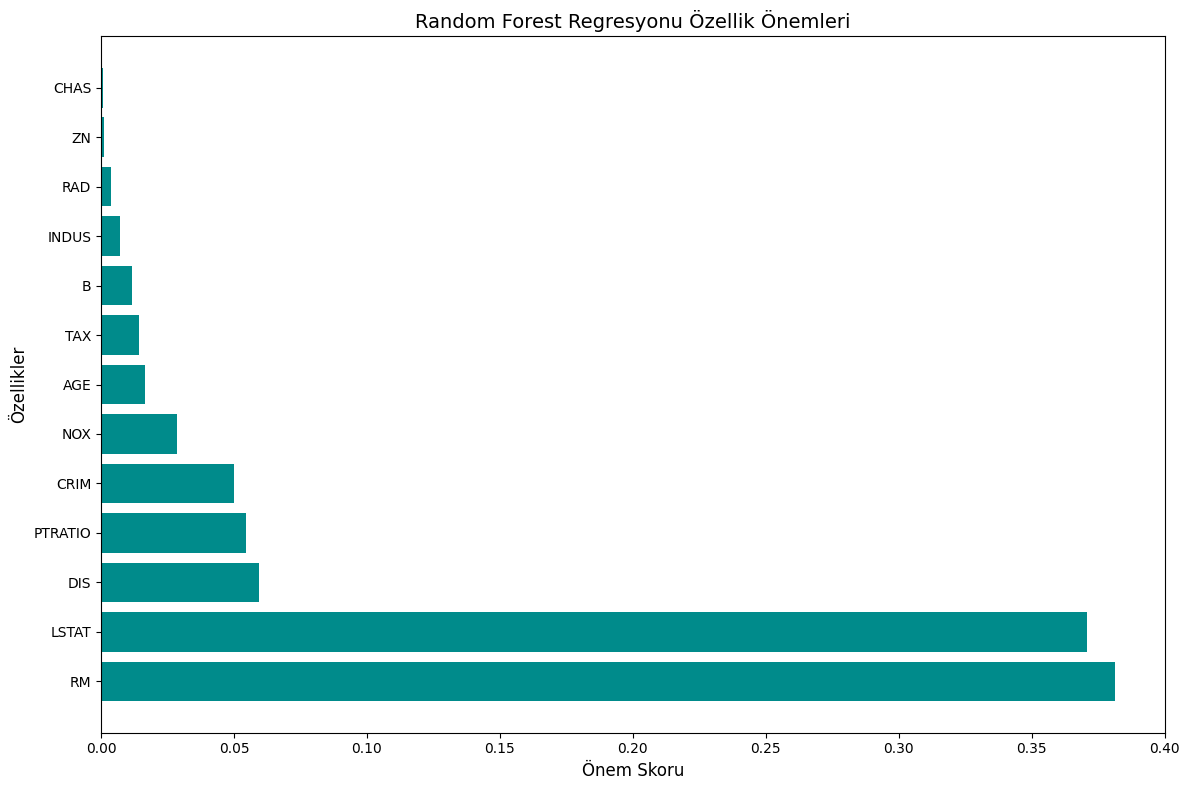

In [10]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Veri setini yükleme
df = pd.read_csv('data (2).csv')

# Eksik değerleri medyan ile doldurma
df['RM'] = df['RM'].fillna(df['RM'].median())

# Bağımsız değişkenleri (X) ve hedef değişkeni (y) ayırma
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Veri setinin tamamını ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ayarlanmış Random Forest modelini eğitme
best_rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)
best_rf_model.fit(X_scaled, y)

# Özellik önemlerini çıkarma
feature_importances = best_rf_model.feature_importances_

# Özellik adları ve önemlerini bir DataFrame'e dönüştürme
features = X.columns
importance_df = pd.DataFrame({
    'Özellik': features,
    'Önem': feature_importances
})

# Önem sırasına göre DataFrame'i sıralama
importance_df = importance_df.sort_values(by='Önem', ascending=False)

# Düzeltilmiş görselleştirme kodu
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Özellik'], importance_df['Önem'], color='darkcyan')
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.title('Random Forest Regresyonu Özellik Önemleri', fontsize=14)
plt.tight_layout()
plt.savefig('random_forest_feature_importances.png')

print("Özellik önemleri grafiği 'random_forest_feature_importances.png' olarak başarıyla güncellendi.")

# En önemli 5 özelliği yazdırma
print("\nEn önemli 5 özellik:")
print(importance_df.head())

En önemli 5 özellik:

RM (Konut başına ortalama oda sayısı) - 0.381

LSTAT (Nüfusun alt statüsünün yüzdesi) - 0.370

DIS (Boston'daki beş ana iş merkezine olan uzaklık) - 0.059

PTRATIO (Öğrenci-öğretmen oranı) - 0.054

CRIM (Mahalle başına suç oranı) - 0.050